# Домашняя работа 9. Деревья решений. (32 балла)

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

## Полезная литература

- [Habrahabr: ODS деревья решений](https://habrahabr.ru/company/ods/blog/322534/#derevo-resheniy)
- [ВМК МГУ семинары по решающим деревьям](https://github.com/esokolov/ml-course-msu/blob/master/ML16/lecture-notes/Sem04_trees.pdf)
- [Sklearn Decision Trees](http://scikit-learn.org/stable/modules/tree.html)

## 1. Сравнение моделей деревьев

В этом блоке вы сравните разные конфигурации композиций деревьев:
- DecisionTree
- Bagging
- Bagging с другими настройками подбора признаков для разбиения
- RandomForest

Будем использовать [датасет с винишком](https://archive.ics.uci.edu/ml/datasets/wine+quality) - это задача то ли классификации то ли регресси - нужно предсказывать качество вина. Будем думать что это классификация.

![](https://upload.wikimedia.org/wikipedia/en/thumb/7/7c/Lulz_Security.svg/300px-Lulz_Security.svg.png)

### 1.1 Чтение данных (1 балла)

Данные лежат как обычно в `'../../data/winequality-red.csv.gz'`.

- Прочитайте их с помощью pandas
- нарисуйте countplot целевого признака `quality`.
- Что вы думаете по поводу количества представителей каждого класса.
- Разбейте данные на X и y.

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

np.random.seed(seed=42)

df = pd.read_csv('data/winequality-red.csv.gz')
df.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [187]:
columns = df.columns[0]
columns = columns.replace("\"", "").split(";")

dfwine = pd.DataFrame(columns=columns)
for i in range(0,df.shape[0]):
    row = df.loc[i, df.columns[0]]
    row = np.array(row.split(";")).astype(float)
    series = pd.Series(row, index=columns)
    dfwine = dfwine.append(series, ignore_index=True)

dfwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


5.6360225140712945


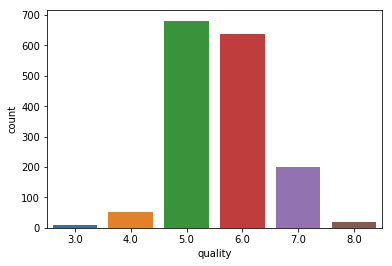

In [188]:
print(dfwine['quality'].mean())
sns.countplot('quality', data=dfwine)

In [216]:
X = dfwine.drop(['quality'], axis=1)
y = dfwine['quality']

In [190]:
#Самые низкие и самые высокие оценки никто винам не ставил, в основном ставили средние баллы

### 1.2 Сравнение моделей (4 балла)

Задача классификации. Все признаки уже числовые. Значит можно пробовать просто все модели и выбрать лучшую. Так и поступим, сделайте кросс валидацию на 5 фолдах, используя `sklearn.model_selection.KFold` как аргумент у `cross_val_score`. Метрика качества будет `accuracy`.

Алгоритмы для тестирования:
- KNeighborsClassifier с 10 соседями
- KNeighborsClassifier с 10 соседями и масштабированием StandartScaler
- RidgeClassifier
- DecisionTreeClassifier 
- BaggingClassifier c 100 деревьев
- BaggingClassifier с 100 деревьев и каждое дерево обучается только по половине случайно выбранных признаков (см аргументы)
- RandomForestClassifier c 100 деревьев

Выведите среднее значение метрики качества для каждого из классификаторов. 

**hint**: каждый следующий алгоритм, будет показывать качество лучше, чем предыдущий. Если у вас не так - то что-то вы делаете неправильно. Везде зафиксируйте random_state=42.

In [217]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(seed=42)

kf = KFold(n_splits=5)

clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(X, y)

score = cross_val_score(clf, X, y, cv=kf, scoring = 'accuracy')

print("mean: {0:.4f}".format(score.mean()))
print("std: {0:.4f}".format(score.std()))

mean: 0.4490
std: 0.0434


In [192]:
from sklearn.preprocessing import StandardScaler
np.random.seed(seed=42)

scaler = StandardScaler()
clf = KNeighborsClassifier(n_neighbors=10)
x = scaler.fit_transform(X)
clf.fit( x, y)

score = cross_val_score(clf, x, y, cv=kf, scoring = 'accuracy')

print("mean: {0:.4f}".format(score.mean()))
print("std: {0:.4f}".format(score.std()))

mean: 0.5491
std: 0.0342


In [193]:
from sklearn.linear_model import RidgeClassifier

clf = RidgeClassifier(random_state=42)
clf.fit(X, y)

score = cross_val_score(clf, X, y, cv=kf, scoring = 'accuracy')

print("mean: {0:.4f}".format(score.mean()))
print("std: {0:.4f}".format(score.std()))

mean: 0.5754
std: 0.0443


In [194]:
from sklearn.tree import DecisionTreeClassifier
np.random.seed(seed=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

score = cross_val_score(clf, X, y, cv=kf, scoring = 'accuracy')

print("mean: {0:.4f}".format(score.mean()))
print("std: {0:.4f}".format(score.std()))

mean: 0.4515
std: 0.0355


In [195]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(n_estimators=100, random_state=42)
bagging.fit(X, y)

score = cross_val_score(bagging, X, y, cv=kf, scoring = 'accuracy')

print("mean: {0:.4f}".format(score.mean()))
print("std: {0:.4f}".format(score.std()))

mean: 0.5704
std: 0.0117


In [218]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(n_estimators=100, random_state=42, max_samples=0.5) #max_features=0.5
bagging.fit(X, y)

score = cross_val_score(bagging, X, y, cv=kf, scoring = 'accuracy')

print("mean: {0:.4f}".format(score.mean()))
print("std: {0:.4f}".format(score.std()))
bagging

mean: 0.5754
std: 0.0199


BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=0.5,
         n_estimators=100, n_jobs=None, oob_score=False, random_state=42,
         verbose=0, warm_start=False)

In [197]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X, y)

score = cross_val_score(clf, X, y, cv=kf, scoring = 'accuracy')

print(score.mean())
score.std()

0.580382053291536


0.03000622001765695

### 1.3 Расуждения (8 баллов)

Ответьте на вопросы развернуто, можете полистать литературу:

- почему наблюдается значимая разница в качестве у KNeighborsClassifier с масштабированием и без
- почему масштабирование не важно для деревьев решений
- почему бэггинг на половине признаков для каждого дерева дал качество предсказания больше, чем на всех? (а он дал!)
- у какой модели наибольшей отклонение от среднего качества предсказаний? А почему??

In [198]:
#1)Масштабирование делает стандартное отклонение единичныым, а среднее близко к нулю.
#Значения признаков надо масштабировать, чтобы один признак с большим диапазоном значений не вносил больший вклад 
#в расстояние, чем чем другой признак с меньшими значениями.
#
#2)Признаки не зависят от масштаба друг друга. Каждый признак оценивается в своём же масштабе.
#
#
#3)Метод Bagging - каждое дерево обучается на собственном подмножестве размера l обучающей выборки, выбранном случайно. 
#Недостаток данного метода – при росте размера обучающей выборки эффект пропадает, так как подвыборки становятся все 
#более похожими (поскольку взяты из одного вероятностного распределения, а влияние случайных отклонений ослабевает).
# Из этого текста следует, что чем больше размер выборки тем может стать всё хуже.


## 2 Переобучение и Ко

В последнем задании вы уже заметили, что случайный лес может вести себя немного нестабильно. В этом задании мы возьмем опять датасет MNIST(простите) и будем его решать деревьями. Почему мы взяли его? Потому что в нем фактически много разных признаков (значения пикселей в пространстве), а деревья строятся делая разбиения по признакам. Обычно на эти разбиения не обращают внимание, так как главное что тюнят - это глубина дереьвев, количество деревьев, а кучу других параметров обходят стороной, так как они "неясные". Попробуем прояснить их.

### 2.1 Загрузка датасета (1 балл)

Загрузите датасет с помощью функции `sklearn.datasets.load_digits`. В нем будут 64px картинки в векторной форме.

Нарисуйте первые 10 цифр в одной ячейке, чтобы было красиво.

In [2]:
from sklearn import datasets

X, y = datasets.load_digits(return_X_y=True)
#X_train, X_test, y_train, y_test = train_test_split(X, y)

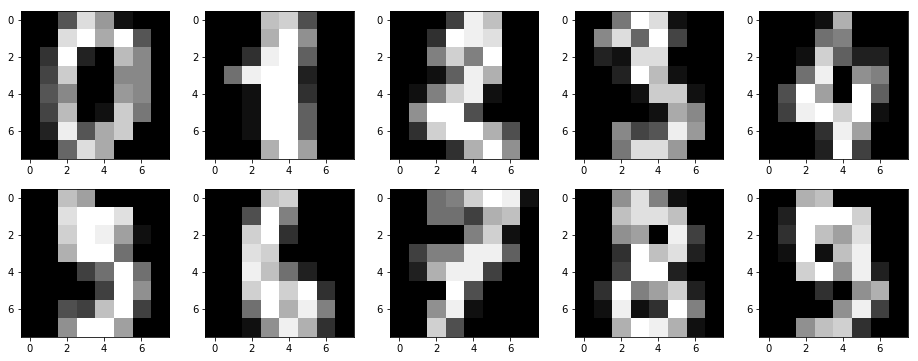

In [200]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]), cmap='gray')

### 2.2 Перебор классификаторов (3 балла)

В этом задании вам снова придется перебрать несколько классификаторов, но теперь мы обратим внимание на другие гиперпараметры и их влияние на качество классификации, кстати опять `accuracy`.

Сделайте кроссвалидацию на 10 фолдах, указав `cv=10` для следующих классификаторов:

- DecisionTreeClassifier с параметрами по-умолчанию
- BaggingClassifier с 100 деревьвев
- BaggingClassifier с 100 деревьев, НО с ограничением на максимальное количество признаков, участвующих при обучении каждого из деревьев в $\sqrt{N}$, где $N$ - это число признаков.
- BaggingClassifier с 100 деревьев, НО с ограничением на количество признаков участвующих в разбиении для каждого из деревьев в $\sqrt{N}$, где $N$ - это число признаков. Это отличается от предыдущей модели тем, где ограничивается `max_features`. Читайте документацию :trollface:
- обычный случайный лес со 100 деревьями

In [201]:
np.random.seed(seed=42)

clf = DecisionTreeClassifier()
clf.fit(X, y)

score = cross_val_score(clf, X, y, cv=10, scoring = 'accuracy')

print("mean: {0:.4f}".format(score.mean()))
print("std: {0:.4f}".format(score.std()))

mean: 0.8252
std: 0.0383


In [202]:
bagging = BaggingClassifier(n_estimators=100, random_state=42)
bagging.fit(X, y)

score = cross_val_score(bagging, X, y, cv=10, scoring = 'accuracy')

print("mean: {0:.4f}".format(score.mean()))
print("std: {0:.4f}".format(score.std()))

mean: 0.9266
std: 0.0333


In [214]:
bagging = BaggingClassifier(max_features=int(np.sqrt(X.shape[1])), n_estimators=100, random_state=42)
bagging.fit(X, y)

score = cross_val_score(bagging, X, y, cv=10, scoring = 'accuracy')

print("mean: {0:.4f}".format(score.mean()))
print("std: {0:.4f}".format(score.std()))

mean: 0.9312
std: 0.0352


In [225]:
d_tree = DecisionTreeClassifier(random_state=42, max_features=int(np.sqrt(X.shape[1])))
bagging = BaggingClassifier(base_estimator=d_tree, n_estimators=100, random_state=42)
bagging.fit(X, y)

score = cross_val_score(bagging, X, y, cv=10, scoring = 'accuracy')

print("mean: {0:.5f}".format(score.mean()))
print("std: {0:.5f}".format(score.std()))


mean: 0.95333
std: 0.02069


In [224]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

clf.fit(X, y)

score = cross_val_score(clf, X, y, cv=10, scoring = 'accuracy')

print("mean: {0:.5f}".format(score.mean()))
print("std: {0:.5f}".format(score.std()))

mean: 0.95331
std: 0.02068


### 2.3 В чём разница? (3 балла)

Ответье на вопрос: 

Странно то как? Почему ограничение на количество признаков в разбиении дерева и ограничение в количестве признаков для построения каждого дерева в BaggingClasifier дало СОВСЕМ разный результат в качестве предсказания? В чем магия?

![](https://i.ytimg.com/vi/_5GWMIAHc08/hqdefault.jpg)

### 2.4 Количество деревьев (2 балла)

Сделайте перебор количества деревьев для `RandomForestClassifier`. Сохраните качества кросс валидации на 10 фолдах для `[1,5,10,15,50,100,150,200,300]` количества деревьев. Нарисуйте график, где по оси x - количество деревьев, а по оси y - качество. При каком количестве деревьев получается самое хорошее качество?

In [248]:
from sklearn.metrics import mean_squared_error

#scores_train = []
#scores_test = []
results = []
trees =[1,5,10,15,50,100,150,200,300]
for i in trees:
    clf = RandomForestClassifier(n_estimators=i)
    #clf.fit(X, y)
    results.append(cross_val_score(clf, X, y, cv=10).mean())
   # pred_train = clf.predict(X_train)
    #pred_test = clf.predict(X_test)
    #scores_train.append(mean_squared_error(y_train, pred_train))
    #scores_test.append(mean_squared_error(y_test, pred_test))
    #print("trees={} \t train={:.4f} \t test={:.4f}".format(i, scores_train[-1], scores_test[-1]))

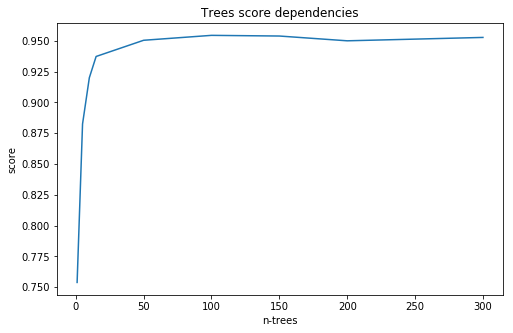

In [249]:
plt.figure(figsize=(8, 5))
plt.plot(trees, results)
plt.xlabel("n-trees")
plt.ylabel("score")
plt.title("Trees score dependencies")
plt.show()

### 2.5 Количество признаков  (2 балла)

Переберите теперь максимальное количество признаков для `RandomForestClassifier` на 100 деревьях, от 1 до 64 с шагом 5. Постройте график качества по кроссвалидации на 10 фолдах.

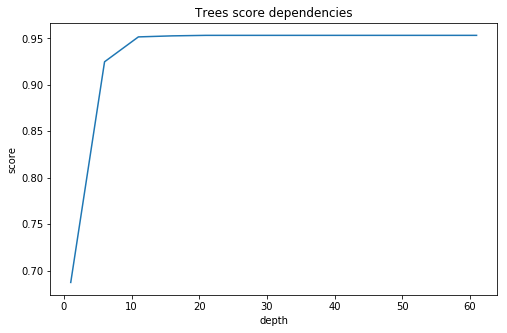

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def plot_rf_tree_depth():
    depth = np.arange(1, 64, 5)
    results = []
    for d in depth:
        clf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=d)
        results.append(cross_val_score(clf, X, y, cv=10).mean())
        
    plt.figure(figsize=(8, 5))
    plt.plot(depth, results)
    plt.xlabel("depth")
    plt.ylabel("score")
    plt.title("Trees score dependencies")
    plt.show()
    
plot_rf_tree_depth() 

### 2.5 Вопросы по RandomForest (8 баллов)

Ответьте на вопросы:

- Что происходит с ростом числа деревьев у случайного леса. Можно ли просто всегда брать 5000 деревьев и быть счастливым?
- Как зависит качество предсказания в дереве в зависимости от max_features?
- Почему качество зависит от max_features?
- Как глубина деревьев влияет на качество случайного леса?

1)При очень маленьком числе деревьев, случайный лес работает хуже, чем при большем числе деревьев. С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.
2)При большом количестве признаков качество классификации становится хуже, чем при малом количестве признаков. 
3)Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.
4)При небольшой максимальной глубине деревьев качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).

![](https://habrastorage.org/web/ad8/366/a44/ad8366a4469346c6b2e1306495b05d1a.jpg)